<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson1/GB_NN_intro_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

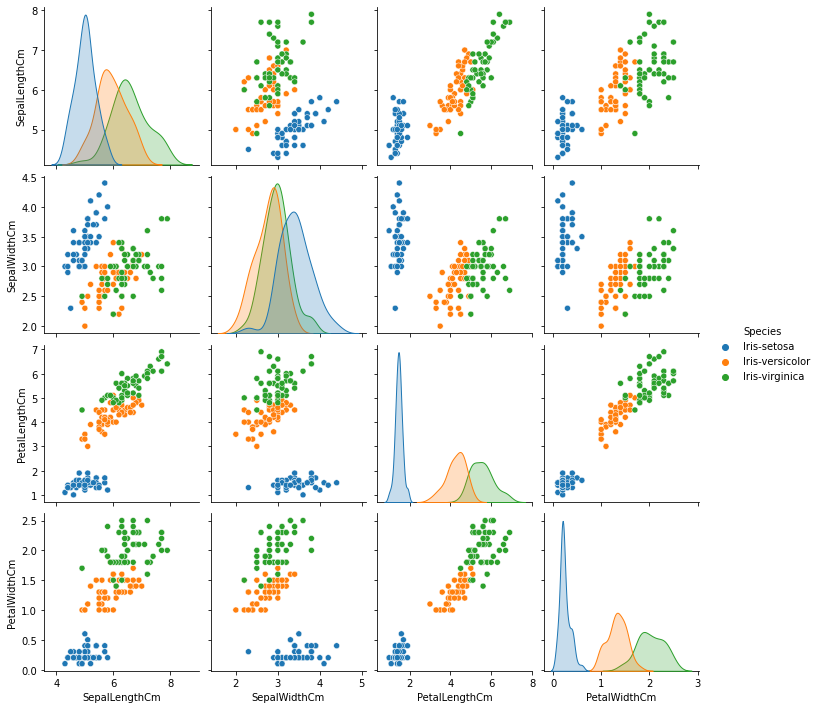

In [179]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        # l = layer2[i]
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
# iris_data = pd.read_csv("lesson_source/Iris.csv")
iris_data = pd.read_csv("https://raw.githubusercontent.com/nedokormysh/GB_intro_NN/lesson1/Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
# x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
# y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [180]:
# функция запуск нейронной сети с заданными параметрами

def test_nn(X_train,
            X_test,
            y_train,
            y_test,
            n_neurons: int = 5,            
            lr: float = 0.1,
            n_epochs: int = 5000
            ):
  
  train_errors = []
  test_errors = []

  np.random.seed(42)
  
  w0 = 2*np.random.random((4, n_neurons)) - 1 # для входного слоя
  w1 = 2*np.random.random((n_neurons, 3)) - 1 # для внутреннего слоя 
 
  # процесс обучения
  for i in range(n_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr
    
    error = np.mean(np.abs(layer2_error))
    train_errors.append(error)
    accuracy_train = (1 - error) * 100

    # ошибки на test
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t
      
    error_t = np.mean(np.abs(layer2_error_t))
    test_errors.append(error_t)
    accuracy_test = (1 - error_t) * 100

        
  print("Точность нейронной сети для обучающих данных " + str(round(accuracy_train, 2)) + "%")
  print("Точность нейронной сети для тестовых данных " + str(round(accuracy_test, 2)) + "%")
  
  return accuracy_train, accuracy_test, train_errors, test_errors

**Проверка влияния количества нейронов в слоях на качество обучения**

In [181]:
accuracy_all_train = []
accuracy_all_test = []

for n in range(1, 10):
  print(f'\033[1mКоличество нейронов = {n}\033[0m')
  accuracy_train, accuracy_test, train_errors, test_errors = test_nn(X_train,
                                X_test,
                                y_train,
                                y_test,
                                n_neurons = n)
  accuracy_all_train.append(round(accuracy_train, 2))
  accuracy_all_test.append(round(accuracy_test, 2))
  
  print('-' * 60)

Количество нейронов = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


Точность нейронной сети для обучающих данных 58.3%
Точность нейронной сети для тестовых данных 54.06%
------------------------------------------------------------
Количество нейронов = 2
Точность нейронной сети для обучающих данных 80.3%
Точность нейронной сети для тестовых данных 81.61%
------------------------------------------------------------
Количество нейронов = 3
Точность нейронной сети для обучающих данных 96.26%
Точность нейронной сети для тестовых данных 98.03%
------------------------------------------------------------
Количество нейронов = 4
Точность нейронной сети для обучающих данных 96.05%
Точность нейронной сети для тестовых данных 97.53%
------------------------------------------------------------
Количество нейронов = 5
Точность нейронной сети для обучающих данных 96.12%
Точность нейронной сети для тестовых данных 96.7%
------------------------------------------------------------
Количество нейронов = 6
Точность нейронной сети для обучающих данных 96.38%
Точность не

In [182]:
x = list(range(1, 10))
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Качество моделей на train и тест для двухслойной сети')

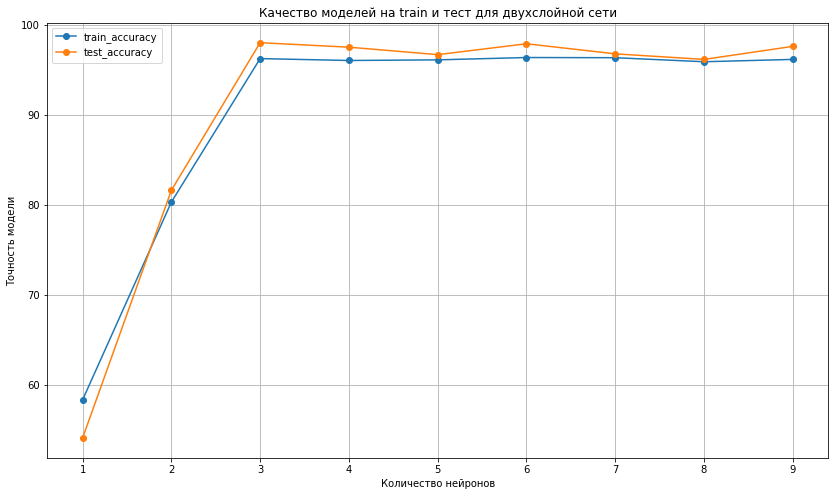

In [183]:
plt.figure(figsize=(14, 8))
plt.plot(x, accuracy_all_train, marker='o', label='train_accuracy')
plt.plot(x, accuracy_all_test, marker='o', label='test_accuracy')
plt.legend(loc='best')
plt.ylabel('Точность модели')
plt.xlabel('Количество нейронов')
plt.grid()
plt.title('Качество моделей на train и тест для двухслойной сети')

Для двухслойной сети увеличение количества моделей ведёт к увеличению точности, но имеет плато, которое уже не даёт улучшения качества. Для lr = 0.1 и количества эпох 5000 имеем оптимальное значение 6.

**Проверка влияния скорости обучения на качество обучения**

Скорость обучения = 0.1 
Точность нейронной сети для обучающих данных 96.38%
Точность нейронной сети для тестовых данных 97.91%
------------------------------------------------------------
Скорость обучения = 0.01 
Точность нейронной сети для обучающих данных 91.25%
Точность нейронной сети для тестовых данных 92.89%
------------------------------------------------------------
Скорость обучения = 0.001 
Точность нейронной сети для обучающих данных 72.16%
Точность нейронной сети для тестовых данных 74.94%
------------------------------------------------------------
Скорость обучения = 0.0001 
Точность нейронной сети для обучающих данных 56.19%
Точность нейронной сети для тестовых данных 56.01%
------------------------------------------------------------
Скорость обучения = 1e-05 
Точность нейронной сети для обучающих данных 53.04%
Точность нейронной сети для тестовых данных 54.37%
------------------------------------------------------------
Скорость обучения = 1e-06 
Точность нейронной с

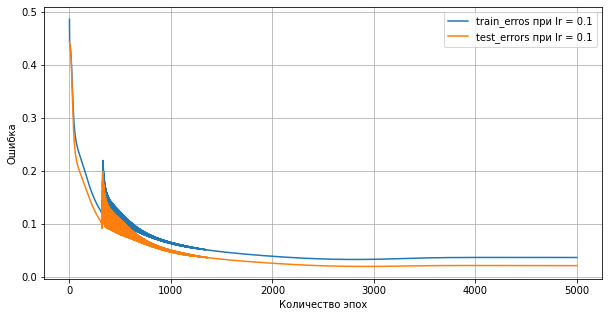

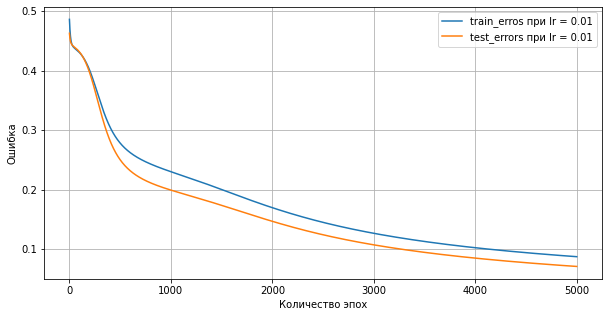

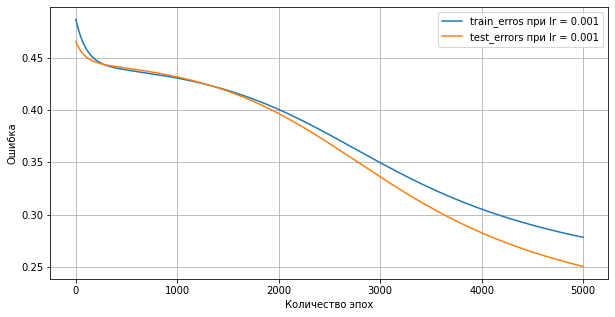

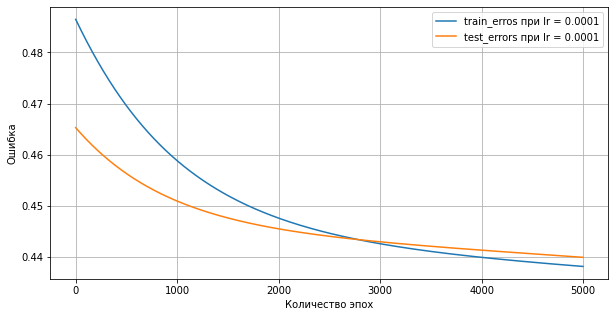

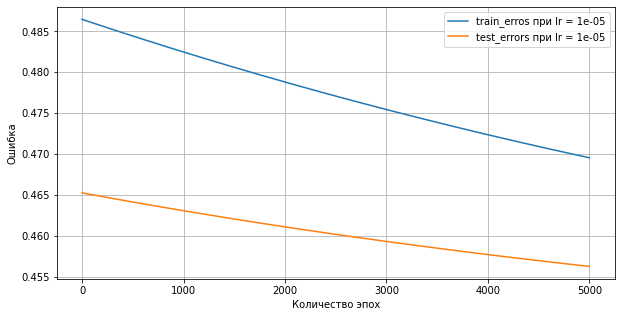

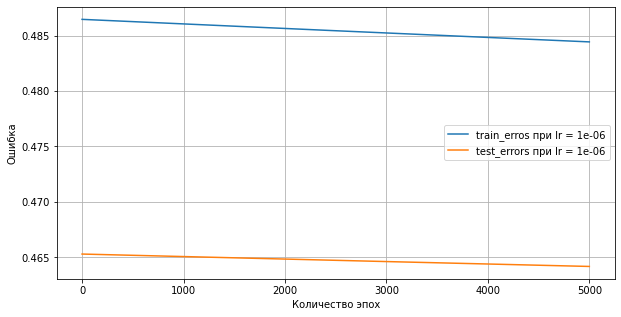

In [184]:
accuracy_all_train = []
accuracy_all_test = []
train_all_errors = []
test_all_errors = []

lst_lr = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

for n in lst_lr:
  print(f'\033[1mСкорость обучения = {n} \033[0m')
  accuracy_train, accuracy_test, train_errors, test_errors = test_nn(X_train,
                                X_test,
                                y_train,
                                y_test,
                                n_neurons = 6,
                                lr = n)
  accuracy_all_train.append(round(accuracy_train, 2))
  accuracy_all_test.append(round(accuracy_test, 2))

  plt.figure(figsize=(10, 5))
  plt.ylabel('Ошибка')
  plt.xlabel('Количество эпох')
  plt.plot(train_errors, label=f'train_erros при lr = {n}')
  plt.plot(test_errors, label=f'test_errors при lr = {n}')
  plt.legend(loc='best')
  plt.grid()

  print('-' * 60)

Можем видеть, что при больших значения скорости обучения у нас не наблюдается сходимость. При lr = 0.1 видимо наблюдаем ещё и локальный минимум. При малых значениях скорости обучения не успеваем сойтись к минимуму при заданных параметрах эпох.

**Проверка влияния количества эпох на качество обучения**

Скорость обучения = 300
Точность нейронной сети для обучающих данных 64.96%
Точность нейронной сети для тестовых данных 66.36%
------------------------------------------------------------
Скорость обучения = 2000
Точность нейронной сети для обучающих данных 83.01%
Точность нейронной сети для тестовых данных 85.3%
------------------------------------------------------------
Скорость обучения = 5000
Точность нейронной сети для обучающих данных 91.25%
Точность нейронной сети для тестовых данных 92.89%
------------------------------------------------------------
Скорость обучения = 10000
Точность нейронной сети для обучающих данных 94.38%
Точность нейронной сети для тестовых данных 95.85%
------------------------------------------------------------
Скорость обучения = 20000
Точность нейронной сети для обучающих данных 95.98%
Точность нейронной сети для тестовых данных 97.3%
------------------------------------------------------------
Скорость обучения = 100000
Точность нейронной сети для о

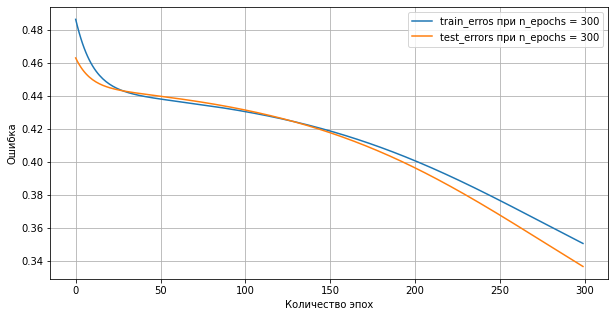

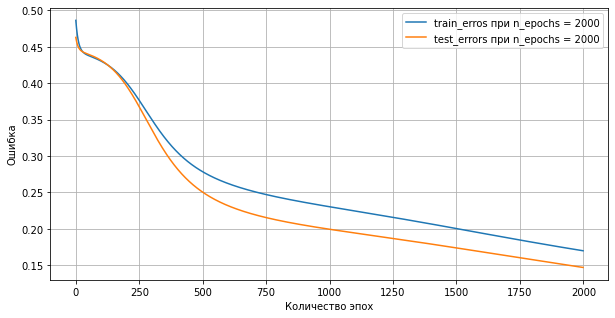

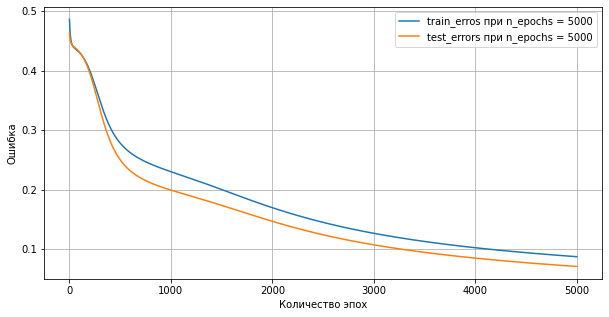

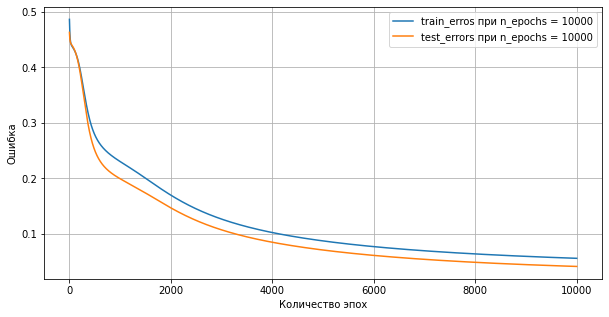

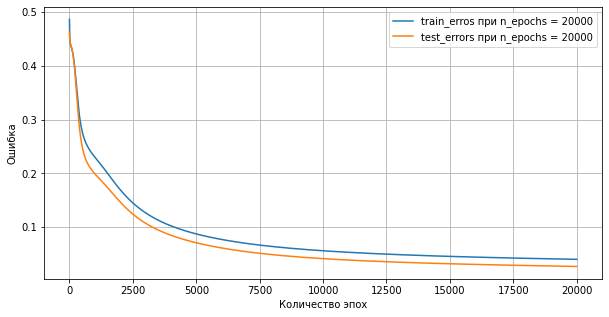

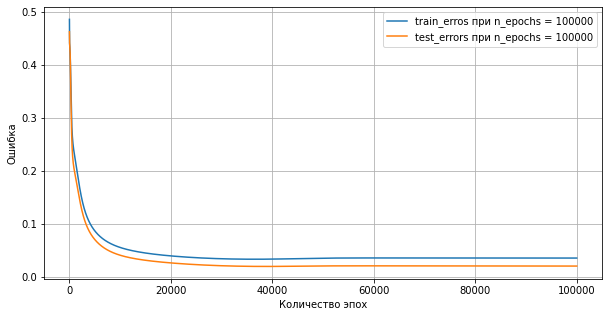

In [185]:
accuracy_all_train = []
accuracy_all_test = []
train_all_errors = []
test_all_errors = []

lst_n_epochs = [300, 2000, 5000, 10000, 20000, 100000]

for n in lst_n_epochs:
  print(f'\033[1mСкорость обучения = {n}\033[0m')
  accuracy_train, accuracy_test, train_errors, test_errors = test_nn(X_train,
                                X_test,
                                y_train,
                                y_test,
                                n_neurons = 6,
                                lr = 0.01,
                                n_epochs = n
                                )
  accuracy_all_train.append(round(accuracy_train, 2))
  accuracy_all_test.append(round(accuracy_test, 2))

  plt.figure(figsize=(10, 5))
  plt.ylabel('Ошибка')
  plt.xlabel('Количество эпох')
  plt.plot(train_errors, label=f'train_erros при n_epochs = {n}')
  plt.plot(test_errors, label=f'test_errors при n_epochs = {n}')
  plt.legend(loc='best')
  plt.grid()

  print('-' * 60)

От количества эпох зависит скорость схождения к минимуму. Также при большом количестве эпох уже не приводит к улучшению значения ошибки.

Добавим ещё один слой в нашу сеть.

In [186]:
accuracy_train, accuracy_test, train_errors, test_errors = test_nn(X_train, X_test, y_train, y_test, n_neurons=6, lr=0.01, n_epochs=10000)

Точность нейронной сети для обучающих данных 94.38%
Точность нейронной сети для тестовых данных 95.85%


In [187]:
# функция запуск нейронной сети с заданными параметрами

def test_nn_3(X_train,
            X_test,
            y_train,
            y_test,
            n1_neurons: int = 6,
            n2_neurons: int = 5,          
            lr: float = 0.01,
            n_epochs: int = 10000
            ):
  
  train_errors = []
  test_errors = []

  np.random.seed(42)
  
  w0 = 2*np.random.random((4, n1_neurons)) 
  w1 = 2*np.random.random((n1_neurons, n2_neurons))
  w2 = 2*np.random.random((n2_neurons, 3))
 
  # процесс обучения
  for i in range(n_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска

    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
        
    w2 += layer2.T.dot(layer3_delta) * lr
    w1 += layer1.T.dot(layer2_delta) * lr
    w0 += layer0.T.dot(layer1_delta) * lr
    
    error = np.mean(np.abs(layer3_error))
    train_errors.append(error)
    accuracy_train = (1 - error) * 100

    # ошибки на test
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer3_t = sigmoid(np.dot(layer2_t, w2))
    layer3_error_t = y_test - layer3_t
      
    error_t = np.mean(np.abs(layer3_error_t))
    test_errors.append(error_t)
    accuracy_test = (1 - error_t) * 100

        
  print("Точность нейронной сети для обучающих данных " + str(round(accuracy_train, 2)) + "%")
  print("Точность нейронной сети для тестовых данных " + str(round(accuracy_test, 2)) + "%")
  
  return accuracy_train, accuracy_test, train_errors, test_errors

In [188]:
accuracy_train, accuracy_test, train_errors, test_errors = test_nn_3(X_train, X_test, y_train, y_test, lr=0.01, n_epochs=10000)

Точность нейронной сети для обучающих данных 87.99%
Точность нейронной сети для тестовых данных 88.14%


In [189]:
for n1_neurons in range(3,7):
    for n2_neurons in range(3,7):
        print(f'\033[1mКоличество нейронов в первом слое = {n1_neurons}, количество нейронов во втором слое = {n2_neurons}\033[0m')
        accuracy_train, accuracy_test, train_errors, test_errors = test_nn_3(X_train,
                                                                   X_test,
                                                                   y_train,
                                                                   y_test,
                                                                   n1_neurons=n1_neurons,
                                                                   n2_neurons=n2_neurons,
                                                                   lr=0.01,
                                                                   n_epochs=10000
                                                                   )
        print('-' * 60)

Количество нейронов в первом слое = 3, количество нейронов во втором слое = 3
Точность нейронной сети для обучающих данных 90.59%
Точность нейронной сети для тестовых данных 91.92%
------------------------------------------------------------
Количество нейронов в первом слое = 3, количество нейронов во втором слое = 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


Точность нейронной сети для обучающих данных 69.46%
Точность нейронной сети для тестовых данных 70.46%
------------------------------------------------------------
Количество нейронов в первом слое = 3, количество нейронов во втором слое = 5
Точность нейронной сети для обучающих данных 95.34%
Точность нейронной сети для тестовых данных 97.98%
------------------------------------------------------------
Количество нейронов в первом слое = 3, количество нейронов во втором слое = 6
Точность нейронной сети для обучающих данных 90.37%
Точность нейронной сети для тестовых данных 91.48%
------------------------------------------------------------
Количество нейронов в первом слое = 4, количество нейронов во втором слое = 3
Точность нейронной сети для обучающих данных 80.96%
Точность нейронной сети для тестовых данных 83.64%
------------------------------------------------------------
Количество нейронов в первом слое = 4, количество нейронов во втором слое = 4
Точность нейронной сети для обуч

Добавление ещё одного слоя для поставленной задачи, не привело к значительному улучшению качества. Возможно требуется более глубокий подбор гиперпараметров, либо задача разрешима и сетью из двух слоёв.